In [29]:
import pandas as pd
import numpy as np

In [30]:
train = pd.read_csv("/kaggle/input/african-credit-scoring/Train.csv")
test = pd.read_csv("/kaggle/input/african-credit-scoring/Test.csv")

train.head(10)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0
5,ID_265607284433267278,265607,Kenya,284433,267278,Type_1,4325.0,4325.0,2022-10-19,2022-10-26,7,Repeat Loan,1297.50,0.300000,1298.0,0
6,ID_261844305920267278,261844,Kenya,305920,267278,Type_1,6735.0,6735.0,2022-11-29,2022-12-06,7,Repeat Loan,2020.50,0.300000,2021.0,0
7,ID_265488287698267278,265488,Kenya,287698,267278,Type_1,1540.0,1562.0,2022-10-25,2022-11-01,7,Repeat Loan,462.00,0.300000,469.0,0
8,ID_268010279432267278,268010,Kenya,279432,267278,Type_1,21496.0,21994.0,2022-10-11,2022-10-18,7,Repeat Loan,0.00,0.000000,0.0,0
9,ID_245399236898267278,245399,Kenya,236898,267278,Type_1,18852.0,18852.0,2022-08-15,2022-08-22,7,Repeat Loan,5655.60,0.300000,5656.0,0


In [31]:
import pandas as pd

def frequency_encode(train, test, col):
    """
    Frequency encoding for a given column. The encoding is based on the train data
    and applied to both train and test sets.
    """
    freq_map = train[col].value_counts().to_dict()
    train[f'{col}_freq'] = train[col].map(freq_map)
    test[f'{col}_freq'] = test[col].map(freq_map)
    return train, test

# Frequency encoding
train, test = frequency_encode(train, test, 'customer_id')
train, test = frequency_encode(train, test, 'tbl_loan_id')
train, test = frequency_encode(train, test, 'lender_id')

In [32]:
test.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,customer_id_freq,tbl_loan_id_freq,lender_id_freq
0,ID_269404226088267278,269404,Kenya,226088,267278,Type_1,1919.0,1989.0,2022-07-27,2022-08-03,7,Repeat Loan,575.7,0.300000,597.0,NaN,NaN,64653.0
1,ID_255356300042267278,255356,Kenya,300042,267278,Type_1,2138.0,2153.0,2022-11-16,2022-11-23,7,Repeat Loan,0.0,0.000000,0.0,128.0,NaN,64653.0
2,ID_257026243764267278,257026,Kenya,243764,267278,Type_1,8254.0,8304.0,2022-08-24,2022-08-31,7,Repeat Loan,207.0,0.025079,208.0,29.0,NaN,64653.0
3,ID_264617299409267278,264617,Kenya,299409,267278,Type_1,3379.0,3379.0,2022-11-15,2022-11-22,7,Repeat Loan,1013.7,0.300000,1014.0,36.0,NaN,64653.0
4,ID_247613296713267278,247613,Kenya,296713,267278,Type_1,120.0,120.0,2022-11-10,2022-11-17,7,Repeat Loan,36.0,0.300000,36.0,208.0,NaN,64653.0


In [33]:
target = train["target"]
data = pd.concat([train.drop("target", axis=1), test])

In [34]:
# data["New_versus_Repeat"].unique()
data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,customer_id_freq,tbl_loan_id_freq,lender_id_freq
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,61.0,1.0,64653.0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,22.0,1.0,64653.0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,9.0,1.0,3542.0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,17.0,1.0,64653.0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,24.0,1.0,64653.0


In [35]:
import pandas as pd


def extract_date_features(df, date_columns):
    """
    Extracts year, month, day, day_of_week, and time differences from date columns in a DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the date columns.
        date_columns (list): List of column names to process for date extraction.
        
    Returns:
        pd.DataFrame: DataFrame with new date features added.

    """
    for col in date_columns:
        # Convert to datetime
        df[col] = pd.to_datetime(df[col], errors='coerce')
        
        # Extract features
        df[f'{col}_year'] = df[col].dt.year
        df[f'{col}_month'] = df[col].dt.month
        df[f'{col}_day'] = df[col].dt.day
        df[f'{col}_day_of_week'] = df[col].dt.dayofweek

    # If there are two columns in the list, calculate the time difference
    if len(date_columns) == 2:
        df['time_to_due_date'] = (df[date_columns[1]] - df[date_columns[0]]).dt.days
    
    return df

# Apply the function to your data
date_columns = ['disbursement_date', 'due_date']
data = extract_date_features(data, date_columns)

In [36]:
data

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,lender_id_freq,disbursement_date_year,disbursement_date_month,disbursement_date_day,disbursement_date_day_of_week,due_date_year,due_date_month,due_date_day,due_date_day_of_week,time_to_due_date
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.00,8448.00,2022-08-30,2022-09-06,...,64653.0,2022,8,30,1,2022,9,6,1,7
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.00,25979.00,2022-07-30,2022-08-06,...,64653.0,2022,7,30,5,2022,8,6,5,7
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.00,7142.00,2024-09-06,2024-09-13,...,3542.0,2024,9,6,4,2024,9,13,4,7
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.00,9233.00,2022-10-20,2022-10-27,...,64653.0,2022,10,20,3,2022,10,27,3,7
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.00,4728.00,2022-11-28,2022-12-05,...,64653.0,2022,11,28,0,2022,12,5,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,ID_297596365331297183,297596,Ghana,365331,297183,Type_3,1730.41,1782.32,2023-02-09,2023-02-16,...,NaN,2023,2,9,3,2023,2,16,3,7
18590,ID_259715231897267278,259715,Kenya,231897,267278,Type_1,1534.00,1534.00,2022-08-04,2022-08-11,...,64653.0,2022,8,4,3,2022,8,11,3,7
18591,ID_296701364008297183,296701,Ghana,364008,297183,Type_3,1372.21,1413.30,2022-06-23,2022-06-30,...,NaN,2022,6,23,3,2022,6,30,3,7
18592,ID_268271242864267278,268271,Kenya,242864,267278,Type_1,5608.00,5781.00,2022-08-23,2022-08-30,...,64653.0,2022,8,23,1,2022,8,30,1,7


In [37]:
data.select_dtypes("object").head()

,ID,country_id,loan_type,New_versus_Repeat
0,ID_266671248032267278,Kenya,Type_1,Repeat Loan
1,ID_248919228515267278,Kenya,Type_1,Repeat Loan
2,ID_308486370501251804,Kenya,Type_7,Repeat Loan
3,ID_266004285009267278,Kenya,Type_1,Repeat Loan
4,ID_253803305312267278,Kenya,Type_1,Repeat Loan


In [38]:
data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,lender_id_freq,disbursement_date_year,disbursement_date_month,disbursement_date_day,disbursement_date_day_of_week,due_date_year,due_date_month,due_date_day,due_date_day_of_week,time_to_due_date
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,64653.0,2022,8,30,1,2022,9,6,1,7
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,...,64653.0,2022,7,30,5,2022,8,6,5,7
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,...,3542.0,2024,9,6,4,2024,9,13,4,7
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,...,64653.0,2022,10,20,3,2022,10,27,3,7
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,...,64653.0,2022,11,28,0,2022,12,5,0,7


In [39]:
data[["country_id", "due_date_year"]]

,country_id,due_date_year
0,Kenya,2022
1,Kenya,2022
2,Kenya,2024
3,Kenya,2022
4,Kenya,2022
...,...,...
18589,Ghana,2023
18590,Kenya,2022
18591,Ghana,2022
18592,Kenya,2022


In [40]:
# data["New_versus_Repeat"]

In [41]:
# Find customer_ids in test but not in train
missing_customer_ids = set(test['customer_id']) - set(train['customer_id'])

# Find tbl_loan_ids in test but not in train
missing_loan_ids = set(test['tbl_loan_id']) - set(train['tbl_loan_id'])

# Display results
print(f"Customer IDs in test but not in train: {len(missing_customer_ids)}")
# print(missing_customer_ids)

print(f"Loan IDs in test but not in train: {len(missing_loan_ids)}")
# print(missing_loan_ids)

Customer IDs in test but not in train: 656
Loan IDs in test but not in train: 16147


In [42]:
def aggregate_features(df):
    # Customer-level aggregation
    customer_features = df.groupby('customer_id').agg(
        total_loans=('tbl_loan_id', 'nunique'),
        avg_loan_amount=('Total_Amount', 'mean'),
        total_amount_repaid=('Total_Amount_to_Repay', 'sum'),
        avg_funding_by_lender=('Amount_Funded_By_Lender', 'mean'),
        new_vs_repeat_ratio=('New_versus_Repeat', lambda x: (x == 'New Loan').sum() / (x == 'Repeat Loan').sum() if (x == 'Repeat Loan').sum() > 0 else 0)
    ).reset_index()

    # Loan-level aggregation
    loan_features = df.groupby('tbl_loan_id').agg(
        total_lenders=('lender_id', 'nunique'),
        total_funded=('Amount_Funded_By_Lender', 'sum'),
        avg_lender_portion_funded=('Lender_portion_Funded', 'mean'),
        avg_lender_portion_repaid=('Lender_portion_to_be_repaid', 'mean')
    ).reset_index()

    # Merge back into the original dataframe
    df = df.merge(customer_features, on='customer_id', how='left')
    df = df.merge(loan_features, on='tbl_loan_id', how='left')

    return df

# Apply aggregation to your data
data = aggregate_features(data)

In [43]:
data.head(3)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,...,time_to_due_date,total_loans,avg_loan_amount,total_amount_repaid,avg_funding_by_lender,new_vs_repeat_ratio,total_lenders,total_funded,avg_lender_portion_funded,avg_lender_portion_repaid
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,...,7,73,7374.753425,540442.0,1466.156301,0.0,1,120.85,0.014305,121.0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,...,7,23,20532.260870,472775.0,4489.273478,0.0,1,7768.50,0.300000,7794.0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,...,7,6,6575.000000,81876.0,1426.166667,0.0,2,2760.00,0.200000,1428.0


In [44]:
def process_categorical_columns(df):
    """
    Encodes categorical columns `loan_type` and `New_versus_Repeat`.
    
    Args:
        df (pd.DataFrame): Input DataFrame.
        
    Returns:
        pd.DataFrame: DataFrame with encoded categorical features.
    """
    # Label encoding for New_versus_Repeat
    df['New_versus_Repeat_encoded'] = df['New_versus_Repeat'].map({'New Loan': 0, 'Repeat Loan': 1})
    
    # One-hot encoding for loan_type
    loan_type_dummies = pd.get_dummies(df['loan_type'], prefix='loan_type')
    df = pd.concat([df, loan_type_dummies], axis=1)
    
    # Frequency encoding for loan_type
    loan_type_freq = df['loan_type'].value_counts(normalize=True)
    df['loan_type_freq_encoded'] = df['loan_type'].map(loan_type_freq)
    
    # Optional: Drop original columns if no longer needed
    df = df.drop(['loan_type', 'New_versus_Repeat'], axis=1)
    
    return df

# Apply the function to your data
data = process_categorical_columns(data)

# Check the updated data
data.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,...,loan_type_Type_23,loan_type_Type_24,loan_type_Type_3,loan_type_Type_4,loan_type_Type_5,loan_type_Type_6,loan_type_Type_7,loan_type_Type_8,loan_type_Type_9,loan_type_freq_encoded
0,ID_266671248032267278,266671,Kenya,248032,267278,8448.0,8448.0,2022-08-30,2022-09-06,7,...,False,False,False,False,False,False,False,False,False,0.863527
1,ID_248919228515267278,248919,Kenya,228515,267278,25895.0,25979.0,2022-07-30,2022-08-06,7,...,False,False,False,False,False,False,False,False,False,0.863527
2,ID_308486370501251804,308486,Kenya,370501,251804,6900.0,7142.0,2024-09-06,2024-09-13,7,...,False,False,False,False,False,False,True,False,False,0.038763
3,ID_266004285009267278,266004,Kenya,285009,267278,8958.0,9233.0,2022-10-20,2022-10-27,7,...,False,False,False,False,False,False,False,False,False,0.863527
4,ID_253803305312267278,253803,Kenya,305312,267278,4564.0,4728.0,2022-11-28,2022-12-05,7,...,False,False,False,False,False,False,False,False,False,0.863527


In [45]:
import pandas as pd

# Load the economic indicators data
econ_data = pd.read_csv("/kaggle/input/african-credit-scoring/economic_indicators.csv")

# Melt the DataFrame to long format
econ_long = econ_data.melt(id_vars=['Country', 'Indicator'], var_name='Year', value_name='Value')

# Clean the 'Year' column to extract the year as an integer
econ_long['Year'] = econ_long['Year'].str.extract('(\d+)', expand=False).astype(int)


# Pivot the data
econ_pivot = econ_long.pivot_table(index=['Country', 'Year'], columns='Indicator', values='Value').reset_index()

# Flatten the columns (optional, for cleaner column names)
econ_pivot.columns.name = None
econ_pivot.columns = [col.replace(' ', '_').replace(',', '').replace('(', '').replace(')', '').replace('%', 'pct').replace('/', '_') for col in econ_pivot.columns]

# View the first few rows
econ_pivot.head()

,Country,Year,Average_precipitation_in_depth_mm_per_year,Deposit_interest_rate_pct,Fossil_fuel_energy_consumption_pct_of_total,Inflation_consumer_prices_annual_pct,Interest_rate_spread_lending_rate_minus_deposit_rate_pct,Lending_interest_rate_pct,Official_exchange_rate_LCU_per_US$_period_average,Real_interest_rate_pct,Unemployment_rate
0,Cote d'Ivoire,2001,1348.0,NaN,34.298397,4.361529,NaN,NaN,732.397693,NaN,5.199
1,Cote d'Ivoire,2002,1348.0,NaN,37.848716,3.077265,NaN,NaN,693.713226,NaN,5.516
2,Cote d'Ivoire,2003,1348.0,NaN,32.501441,3.296807,NaN,NaN,579.897426,NaN,5.858
3,Cote d'Ivoire,2004,1348.0,NaN,24.930573,1.457988,NaN,NaN,527.338032,NaN,5.930
4,Cote d'Ivoire,2005,1348.0,7.6075,25.391257,3.885830,-0.558333,7.049167,527.258363,5.763991,6.041


In [46]:
# Ensure country names match between datasets
# For example, if your main data uses 'Kenya' and 'Ghana', and the econ data uses 'Kenya' and 'Ghana', you're all set.
# If there are discrepancies, you may need to map country names accordingly.

# Merge the datasets
data = data.merge(econ_pivot, how='left', left_on=['country_id', 'due_date_year'], right_on=['Country', 'Year'])

# Drop redundant columns if necessary
data = data.drop(['Country'], axis=1)

In [47]:
data

,ID,customer_id,country_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,...,Year,Average_precipitation_in_depth_mm_per_year,Deposit_interest_rate_pct,Fossil_fuel_energy_consumption_pct_of_total,Inflation_consumer_prices_annual_pct,Interest_rate_spread_lending_rate_minus_deposit_rate_pct,Lending_interest_rate_pct,Official_exchange_rate_LCU_per_US$_period_average,Real_interest_rate_pct,Unemployment_rate
0,ID_266671248032267278,266671,Kenya,248032,267278,8448.00,8448.00,2022-08-30,2022-09-06,7,...,2022.0,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
1,ID_248919228515267278,248919,Kenya,228515,267278,25895.00,25979.00,2022-07-30,2022-08-06,7,...,2022.0,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
2,ID_308486370501251804,308486,Kenya,370501,251804,6900.00,7142.00,2024-09-06,2024-09-13,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ID_266004285009267278,266004,Kenya,285009,267278,8958.00,9233.00,2022-10-20,2022-10-27,7,...,2022.0,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
4,ID_253803305312267278,253803,Kenya,305312,267278,4564.00,4728.00,2022-11-28,2022-12-05,7,...,2022.0,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87243,ID_297596365331297183,297596,Ghana,365331,297183,1730.41,1782.32,2023-02-09,2023-02-16,7,...,2023.0,NaN,11.416667,NaN,38.106966,NaN,NaN,11.020408,NaN,3.079
87244,ID_259715231897267278,259715,Kenya,231897,267278,1534.00,1534.00,2022-08-04,2022-08-11,7,...,2022.0,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805
87245,ID_296701364008297183,296701,Ghana,364008,297183,1372.21,1413.30,2022-06-23,2022-06-30,7,...,2022.0,NaN,12.052083,NaN,31.255895,NaN,NaN,8.272400,NaN,3.084
87246,ID_268271242864267278,268271,Kenya,242864,267278,5608.00,5781.00,2022-08-23,2022-08-30,7,...,2022.0,NaN,7.145176,NaN,7.659863,5.190665,12.335841,117.865989,5.968447,5.805


In [48]:
# Sort data
data.sort_values(['customer_id', 'disbursement_date'], inplace=True)


# Create lag features for each economic indicator
econ_indicator_cols = econ_pivot.columns.drop(['Year', 'Country'])


for col in econ_indicator_cols:
    data[f'{col}_lag1'] = data.groupby('country_id')[col].shift(1)
    data[f'{col}_lag2'] = data.groupby('country_id')[col].shift(2)
    data[f'{col}_lag3'] = data.groupby('country_id')[col].shift(3)

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
for col in econ_indicator_cols:
    data[f'{col}_change'] = data.groupby('country_id')[col].pct_change()

In [51]:
data = data.drop(columns=date_columns, errors = "ignore")

In [52]:
data.select_dtypes("object").head()

,ID,country_id
28131,ID_145124016245684,Kenya
61990,ID_161361065267277,Kenya
62029,ID_166124634245684,Kenya
11098,ID_1487125800245684,Kenya
21458,ID_4534122904245684,Kenya


In [53]:
data

,ID,customer_id,country_id,tbl_loan_id,lender_id,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,...,Unemployment_rate_lag3,Average_precipitation_in_depth_mm_per_year_change,Deposit_interest_rate_pct_change,Fossil_fuel_energy_consumption_pct_of_total_change,Inflation_consumer_prices_annual_pct_change,Interest_rate_spread_lending_rate_minus_deposit_rate_pct_change,Lending_interest_rate_pct_change,Official_exchange_rate_LCU_per_US$_period_average_change,Real_interest_rate_pct_change,Unemployment_rate_change
28131,ID_145124016245684,145,Kenya,124016,245684,14500.0,15738.0,30,10000.00,0.689655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61990,ID_161361065267277,161,Kenya,361065,267277,11025.0,11686.5,30,4097.00,0.371610,...,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
62029,ID_166124634245684,166,Kenya,124634,245684,5881.0,6914.0,30,5881.00,1.000000,...,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
11098,ID_1487125800245684,1487,Kenya,125800,245684,7000.0,7850.0,30,7000.00,1.000000,...,5.805,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
21458,ID_4534122904245684,4534,Kenya,122904,245684,9565.0,10672.0,30,9565.00,1.000000,...,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77831,ID_312654374592267278,312654,Kenya,374592,267278,5000.0,5176.0,7,1000.00,0.200000,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
84596,ID_312654374592251804,312654,Kenya,374592,251804,5000.0,5176.0,7,1000.00,0.200000,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
26942,ID_312696375315267278,312696,Kenya,375315,267278,24970.0,25470.0,7,3121.25,0.125000,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
68909,ID_312696375315251804,312696,Kenya,375315,251804,24970.0,25470.0,7,3121.25,0.125000,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
data = data.drop(columns=["country_id"], errors = "ignore")

In [55]:
data['interest_rate'] = (data['Total_Amount_to_Repay'] - data['Total_Amount']) / data['Total_Amount'] * 100
data['loan_profit_margin'] = (data['Total_Amount_to_Repay'] - data['Total_Amount']) / data['Total_Amount_to_Repay']
data['funding_ratio'] = data['Amount_Funded_By_Lender'] / data['Total_Amount']
data['repayment_ratio'] = data['Lender_portion_to_be_repaid'] / data['Total_Amount_to_Repay']


In [56]:
data['interest_rate_duration'] = data['interest_rate'] * data['duration']
data['interest_rate_funding_ratio'] = data['interest_rate'] * data['funding_ratio']
data['loan_type_interest_rate'] = data['interest_rate'] * data['loan_type_freq_encoded']
data['year_difference'] = data['due_date_year'] - data['disbursement_date_year']


In [57]:
# Example: Aggregations for customer_id
customer_aggregations = data.groupby('customer_id')['interest_rate'].agg(['mean', 'std']).reset_index()
customer_aggregations.columns = ['customer_id', 'interest_rate_mean', 'interest_rate_std']
data = data.merge(customer_aggregations, on='customer_id', how='left')


In [58]:
data['custom_risk_score'] = (data['interest_rate'] * data['duration'] / data['loan_type_freq_encoded'])

In [59]:
# Handle cases where Total_Amount or Total_Amount_to_Repay might be zero
data.replace([np.inf, -np.inf], 0, inplace=True)
# data.fillna(0, inplace=True)  # Fill any NaN values

In [60]:
train = data.set_index("ID").loc[train["ID"].to_list()].reset_index(drop=True)
test = data.set_index("ID").loc[test["ID"].to_list()].reset_index(drop=True)

In [61]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [62]:
train.shape, test.shape

((68654, 113), (18594, 113))

In [63]:
y = target

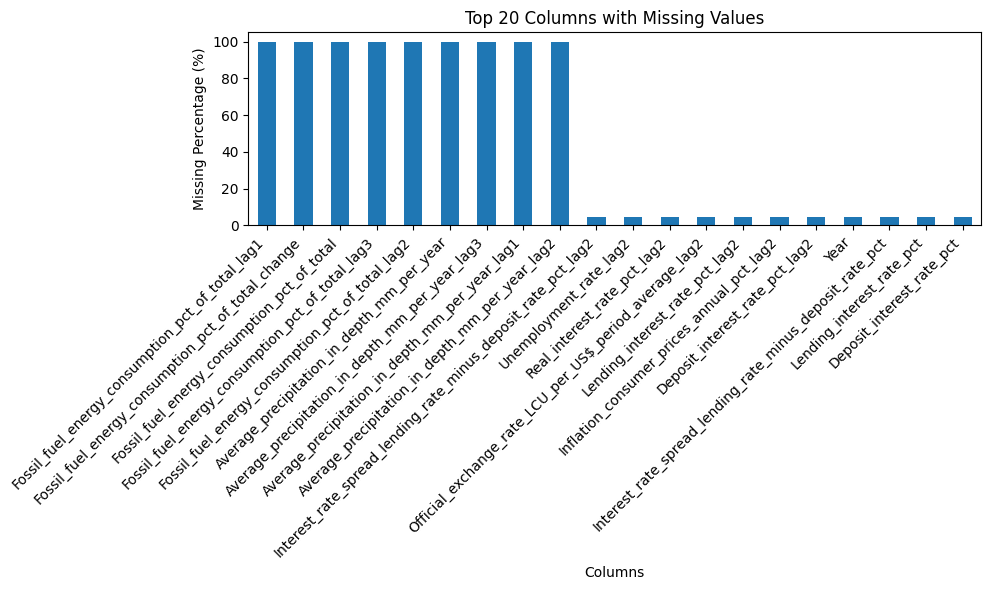

Dropped columns with 40% or more missing values: ['Fossil_fuel_energy_consumption_pct_of_total_lag1', 'Fossil_fuel_energy_consumption_pct_of_total_change', 'Fossil_fuel_energy_consumption_pct_of_total', 'Fossil_fuel_energy_consumption_pct_of_total_lag3', 'Fossil_fuel_energy_consumption_pct_of_total_lag2', 'Average_precipitation_in_depth_mm_per_year', 'Average_precipitation_in_depth_mm_per_year_lag3', 'Average_precipitation_in_depth_mm_per_year_lag1', 'Average_precipitation_in_depth_mm_per_year_lag2']


In [64]:
import matplotlib.pyplot as plt

# Calculate the percentage of missing values for each column
missing_percentage = train.isnull().mean() * 100

# Filter columns with missing values and sort them
missing_summary = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Plot the top 20 columns with the highest missing percentages
top_20_missing = missing_summary.head(20)
plt.figure(figsize=(10, 6))
top_20_missing.plot(kind='bar')
plt.title('Top 20 Columns with Missing Values')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Drop columns with 40% or more missing values
columns_to_drop = missing_summary[missing_summary >= 40].index
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

print(f"Dropped columns with 40% or more missing values: {list(columns_to_drop)}")
# train_cleaned.head()


In [65]:
# train_cleaned

In [66]:
train = train.drop(columns = ["customer_id", "tbl_loan_id", "lender_id"], errors = "ignore")
test = test.drop(columns = ["customer_id", "tbl_loan_id", "lender_id"], errors = "ignore")

In [67]:
features_ = [
 'interest_rate',
 'Total_Amount',
 'Total_Amount_to_Repay',
 'duration',
 'Amount_Funded_By_Lender',
 'Lender_portion_Funded',
 'Lender_portion_to_be_repaid',
 'disbursement_date_year',
 'disbursement_date_month',
 'disbursement_date_day',
 'disbursement_date_day_of_week',
 'due_date_year',
 'due_date_month',
 'due_date_day',
 'due_date_day_of_week',
 'time_to_due_date',
 'total_loans',
 'avg_loan_amount',
 'total_amount_repaid',
 'avg_funding_by_lender',
 'new_vs_repeat_ratio',
 'total_lenders',
 'total_funded',
 'avg_lender_portion_funded',
 'avg_lender_portion_repaid',
 'New_versus_Repeat_encoded',
 'loan_type_Type_1',
 'loan_type_Type_10',
 'loan_type_Type_11',
 'loan_type_Type_12',
 'loan_type_Type_13',
 'loan_type_Type_14',
 'loan_type_Type_15',
 'loan_type_Type_16',
 'loan_type_Type_17',
 'loan_type_Type_18',
 'loan_type_Type_19',
 'loan_type_Type_2',
 'loan_type_Type_20',
 'loan_type_Type_21',
 'loan_type_Type_22',
 'loan_type_Type_23',
 'loan_type_Type_24',
 'loan_type_Type_3',
 'loan_type_Type_4',
 'loan_type_Type_5',
 'loan_type_Type_6',
 'loan_type_Type_7',
 'loan_type_Type_8',
 'loan_type_Type_9',
 'loan_type_freq_encoded',
 'Year',
 'Average_precipitation_in_depth_mm_per_year',
 'Deposit_interest_rate_pct',
 'Fossil_fuel_energy_consumption_pct_of_total',
 'Inflation_consumer_prices_annual_pct',
 'Interest_rate_spread_lending_rate_minus_deposit_rate_pct',
 'Lending_interest_rate_pct',
 'Official_exchange_rate_LCU_per_US$_period_average',
 'Real_interest_rate_pct',
 'Unemployment_rate',
 'Average_precipitation_in_depth_mm_per_year_lag1',
 'Average_precipitation_in_depth_mm_per_year_lag2',
 'Deposit_interest_rate_pct_lag1',
 'Deposit_interest_rate_pct_lag2',
 'Fossil_fuel_energy_consumption_pct_of_total_lag1',
 'Fossil_fuel_energy_consumption_pct_of_total_lag2',
 'Inflation_consumer_prices_annual_pct_lag1',
 'Inflation_consumer_prices_annual_pct_lag2',
 'Interest_rate_spread_lending_rate_minus_deposit_rate_pct_lag1',
 'Interest_rate_spread_lending_rate_minus_deposit_rate_pct_lag2',
 'Lending_interest_rate_pct_lag1',
 'Lending_interest_rate_pct_lag2',
 'Official_exchange_rate_LCU_per_US$_period_average_lag1',
 'Official_exchange_rate_LCU_per_US$_period_average_lag2',
 'Real_interest_rate_pct_lag1',
 'Real_interest_rate_pct_lag2',
 'Unemployment_rate_lag1',
 'Unemployment_rate_lag2',
 'Average_precipitation_in_depth_mm_per_year_change',
 'Deposit_interest_rate_pct_change',
 'Fossil_fuel_energy_consumption_pct_of_total_change',
 'Inflation_consumer_prices_annual_pct_change',
 'Interest_rate_spread_lending_rate_minus_deposit_rate_pct_change',
 'Lending_interest_rate_pct_change',
 'Official_exchange_rate_LCU_per_US$_period_average_change',
 'Real_interest_rate_pct_change',
 'Unemployment_rate_change']

In [68]:
# top_n = 42

# train = train[features_[:top_n]]
# test = test[features_[:top_n]]

# top_n_value =  42



In [69]:
train.isnull().sum().sum()

91009

In [70]:
# # Apply SMOTE to the training set
# smote = SMOTE(random_state=42)
# X_train_resampled, Y_train_resampled = smote.fit_resample(train, y)

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
import numpy as np

# Initialize variables
predictions = []
f1_scores = []


params = {'n_estimators': 1999, 
          'learning_rate': 0.11879569314457171, 
          'max_depth': 20, 
          'subsample': 0.8987217535426607, 
          'colsample_bytree': 0.8941471388174483, 
          'scale_pos_weight': 5.273945237885018
         }

params2 = {'iterations': 628, 'learning_rate': 0.28024249266975065, 'depth': 15, 'scale_pos_weight': 3}

# Set up StratifiedKFold
fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Start fold iteration
for fold_num, (train_index, test_index) in enumerate(fold.split(train, y)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = train.iloc[train_index], train.iloc[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    
    # Initialize the CatBoost classifier
    classifier2 = XGBClassifier(
        **params
        # verbose=False  # Suppress output
    )

    # classifier2 = CatBoostClassifier(
    #     **params2
    #     # verbose=False  # Suppress output
    # )
    
    # Train the model
    classifier2.fit(X_train, Y_train, verbose=False)
    
    # Predict on the test set
    preds = classifier2.predict(X_test)
    
    # Calculate F1 score for this fold
    fold_f1_score = f1_score(Y_test, preds, average='binary')
    f1_scores.append(fold_f1_score)
    
    # Print the F1 score for this fold
    print(f"F1 Score for Fold {fold_num + 1}: {fold_f1_score:.4f}")
    
    # Collect predictions for final test dataset
    predictions.append(classifier2.predict(test))

# Calculate and print the average F1 score
average_f1_score = np.mean(f1_scores)
print(f"\nAverage F1 Score across all folds: {average_f1_score:.4f}")

F1 Score for Fold 1: 0.8880
F1 Score for Fold 2: 0.8920
F1 Score for Fold 3: 0.9014
F1 Score for Fold 4: 0.9006
F1 Score for Fold 5: 0.8964

Average F1 Score across all folds: 0.8957


In [72]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13479
           1       0.90      0.90      0.90       251

    accuracy                           1.00     13730
   macro avg       0.95      0.95      0.95     13730
weighted avg       1.00      1.00      1.00     13730



In [73]:
# train = train.fillna(train.median())

In [74]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import f1_score
# from catboost import CatBoostClassifier
# import numpy as np

# # Initialize variables
# # predictions = []
# f1_scores = []


# params = {'n_estimators': 1999, 
#           'learning_rate': 0.11879569314457171, 
#           'max_depth': 20, 
#           'subsample': 0.8987217535426607, 
#           'colsample_bytree': 0.8941471388174483, 
#           'scale_pos_weight': 5.273945237885018
#          }

# params2 = {'iterations': 628, 'learning_rate': 0.28024249266975065, 'depth': 15, 'scale_pos_weight': 3}

# # Set up StratifiedKFold
# fold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# # Start fold iteration
# for fold_num, (train_index, test_index) in enumerate(fold.split(train, y)):
#     # Split the data into training and testing sets for this fold
#     X_train, X_test = train.iloc[train_index], train.iloc[test_index]
#     Y_train, Y_test = y[train_index], y[test_index]
    
#     # Initialize the CatBoost classifier
#     # classifier2 = XGBClassifier(
#     #     **params
#     #     # verbose=False  # Suppress output
#     # )

#     classifier2 = CatBoostClassifier(
#         **params2
#         # verbose=False  # Suppress output
#     )
    
#     # Train the model
#     classifier2.fit(X_train, Y_train, verbose=False)
    
#     # Predict on the test set
#     preds = classifier2.predict(X_test)
    
#     # Calculate F1 score for this fold
#     fold_f1_score = f1_score(Y_test, preds, average='binary')
#     f1_scores.append(fold_f1_score)
    
#     # Print the F1 score for this fold
#     print(f"F1 Score for Fold {fold_num + 1}: {fold_f1_score:.4f}")
    
#     # Collect predictions for final test dataset
#     predictions.append(classifier2.predict(test))

# # Calculate and print the average F1 score
# average_f1_score = np.mean(f1_scores)
# print(f"\nAverage F1 Score across all folds: {average_f1_score:.4f}")

In [75]:
# from sklearn.impute import SimpleImputer
# from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import f1_score
# import numpy as np

# # Initialize variables
# predictions = []
# f1_scores = []

# params = {
#     'n_estimators': 1999,
#     'learning_rate': 0.11879569314457171,
#     'max_depth': 10,
#     'subsample': 0.8987217535426607,
#     'colsample_bytree': 0.8941471388174483,
#     # 'scale_pos_weight': 5.273945237885018
# }

# # Set up StratifiedKFold
# fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Initialize SMOTE and Imputer
# smote = SMOTE(random_state=42)
# imputer = SimpleImputer(strategy="mean")  # Impute missing values

# # Start fold iteration
# for fold_num, (train_index, test_index) in enumerate(fold.split(train, y)):
#     # Split the data into training and testing sets for this fold
#     X_train, X_test = train.iloc[train_index], train.iloc[test_index]
#     Y_train, Y_test = y[train_index], y[test_index]

#     # Impute missing values in the training and testing sets
#     X_train = imputer.fit_transform(X_train)
#     X_test = imputer.transform(X_test)

#     # Apply SMOTE to the training data
#     X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
    
#     # Initialize the XGBoost classifier
#     classifier2 = XGBClassifier(**params)
    
#     # Train the model
#     classifier2.fit(X_train_resampled, Y_train_resampled, verbose=False)
    
#     # Predict on the test set
#     preds = classifier2.predict(X_test)
    
#     # Calculate F1 score for this fold
#     fold_f1_score = f1_score(Y_test, preds, average='binary')
#     f1_scores.append(fold_f1_score)
    
#     # Print the F1 score for this fold
#     print(f"F1 Score for Fold {fold_num + 1}: {fold_f1_score:.4f}")
    
#     # Collect predictions for final test dataset
#     predictions.append(classifier2.predict(test))

# # Calculate and print the average F1 score
# average_f1_score = np.mean(f1_scores)
# print(f"\nAverage F1 Score across all folds: {average_f1_score:.4f}")

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

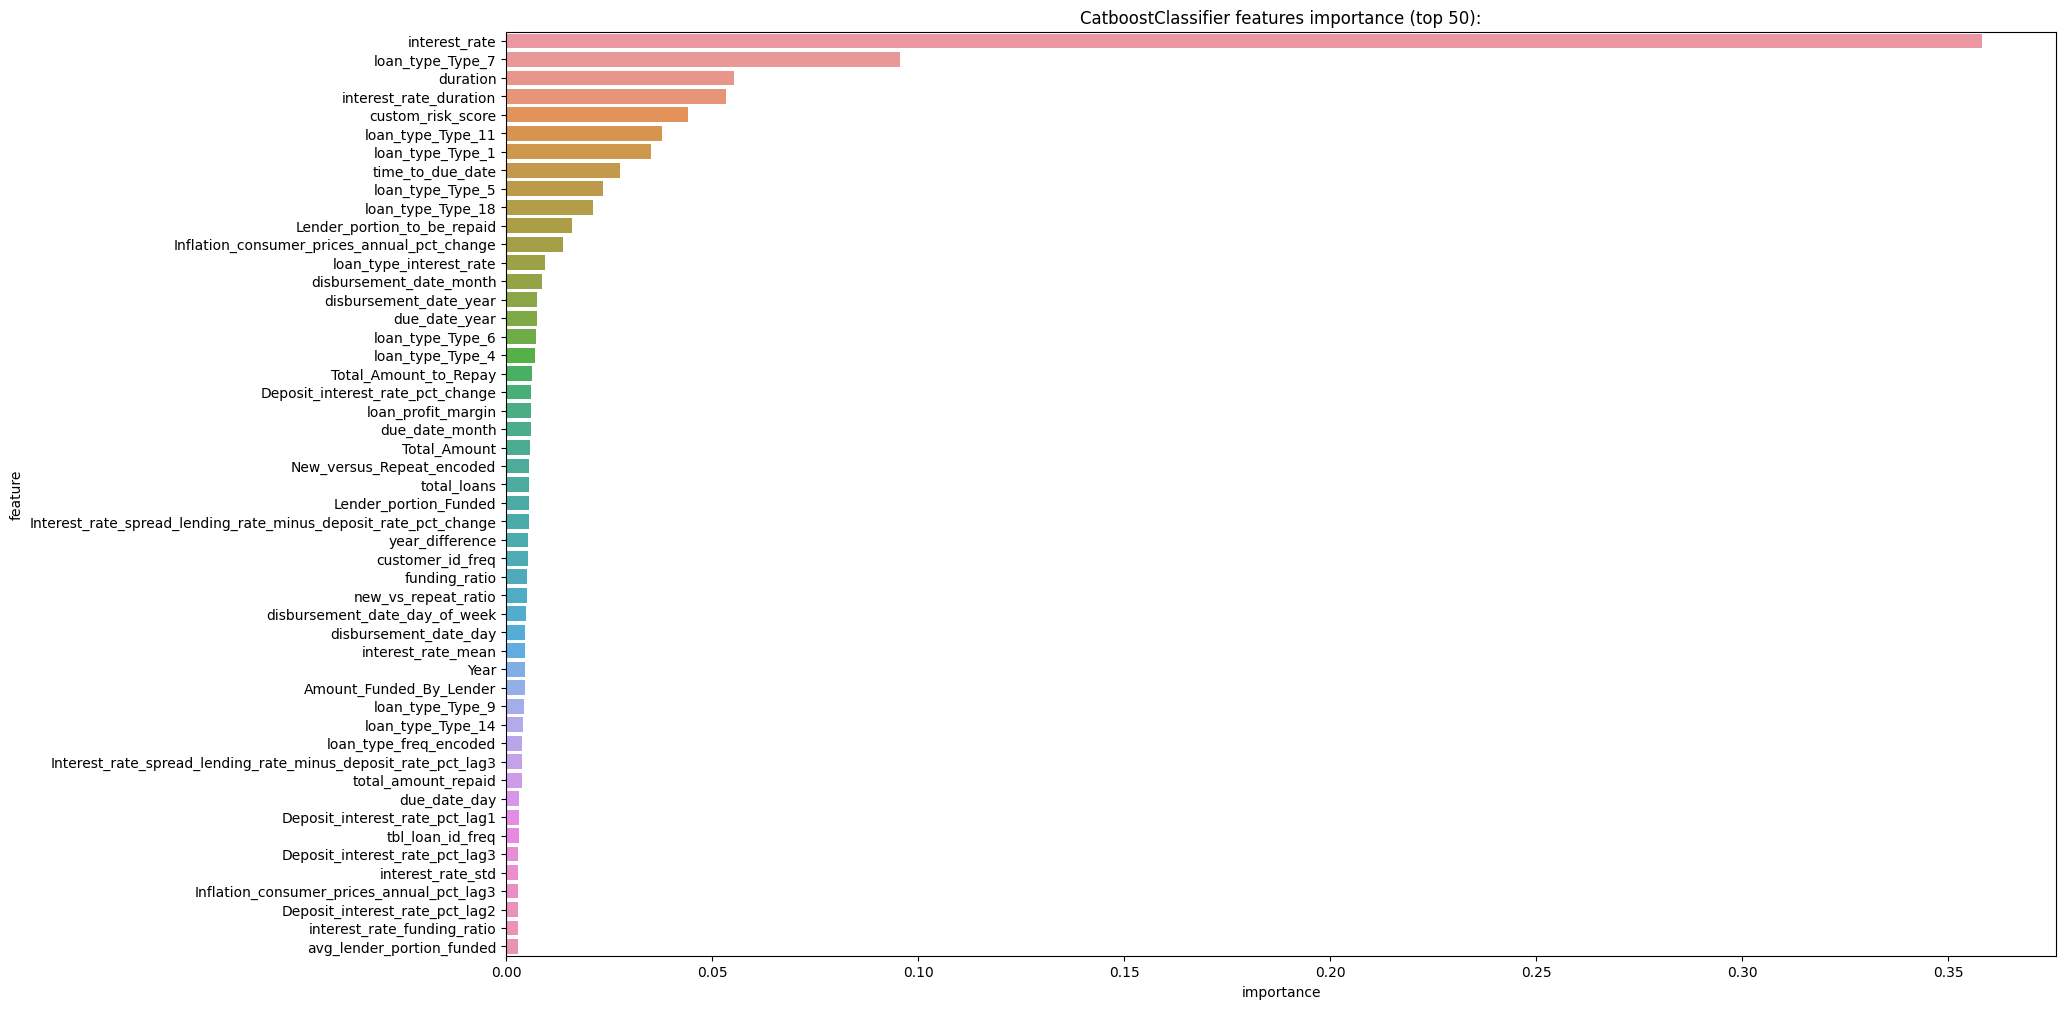

In [77]:
feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = test.columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('CatboostClassifier features importance (top 50):');

In [78]:
# feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
# feature_importance_df['feature'] = X_train.columns

# plt.figure(figsize=(20, 12));
# sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
# plt.title('XGboostClassifier features importance (top 50):');

In [79]:
# feature_importance_df = pd.DataFrame(classifier2.feature_importances_, columns=['importance'])
# feature_importance_df['feature'] = X_train.columns

# plt.figure(figsize=(20, 12))
# sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
# plt.title('LightboostClassifier features importance (top 50):');
predictions_orig = predictions.copy()

In [138]:
predictions = predictions_orig.copy()

In [139]:
# pd.DataFrame(predictions).max(axis=0).value_counts()

In [140]:
 # predictions = pd.DataFrame(predictions).max(axis=0)#.value_counts()

In [141]:
predictions = pd.DataFrame(predictions)
predictions.T.head()
predictions = predictions.mean()
# predictions = predictions.T
predictions = (predictions.T>0.19).astype(int)
predictions

0        0
1        0
2        0
3        0
4        0
        ..
18589    0
18590    0
18591    0
18592    0
18593    0
Length: 18594, dtype: int64

In [142]:
ss = pd.read_csv("/kaggle/input/african-credit-scoring/SampleSubmission.csv")
sub = predictions
ss.head(2)

,ID,target
0,ID_269404226088267278,0
1,ID_255356300042267278,0


In [143]:
# sub_file

In [144]:
sub_file = ss.copy()
sub_file.target = sub
sub_file.to_csv('advice_xgb_modes_pushxtreme.csv', index = False)

In [145]:
sub_file.target.value_counts()

target
0    17907
1      687
Name: count, dtype: int64

In [146]:
# # feature_importance_df
# len(features_)

88

In [ ]:
# import optuna
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import f1_score
# import xgboost as xgb
# import numpy as np
# import warnings
# warnings.filterwarnings("ignore")


# # Define the objective function for Optuna
# def objective(trial):
#     # Define the hyperparameters to tune
#     params = {
#         "n_estimators": trial.suggest_int("n_estimators", 500, 2000),
#         "learning_rate": trial.suggest_loguniform("learning_rate", 1e-2, 0.3),
#         "max_depth": trial.suggest_int("max_depth", 3, 12),
#         # "min_child_weight": trial.suggest_float("min_child_weight", 1, 10),
#         # "gamma": trial.suggest_float("gamma", 0, 5),
#         "subsample": trial.suggest_float("subsample", 0.5, 1.0),
#         "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
#         # "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 10),
#         # "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10),
#         "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 10),
#         # "objective": "binary:logistic",
#         # "eval_metric": "logloss",
#         # "use_label_encoder": False  # Suppress warning for newer XGBoost versions
#     }

#     topn = trial.suggest_int("top_n_value", 20, 87)

#     # Set up StratifiedKFold
#     fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#     f1_scores = []

#     # Cross-validation
#     for train_index, test_index in fold.split(train, y):
#         X_train, X_test = train[features_[:topn]].iloc[train_index], train[features_[:topn]].iloc[test_index]
#         Y_train, Y_test = y[train_index], y[test_index]

#         # Train the XGBoost classifier
#         classifier = xgb.XGBClassifier(**params, verbosity=0, early_stopping_rounds=50)
#         classifier.fit(
#             X_train, 
#             Y_train, 
#             eval_set=[(X_test, Y_test)], 
#             verbose=False
#         )

#         # Predict and calculate F1 score
#         preds = classifier.predict(X_test)
#         fold_f1_score = f1_score(Y_test, preds, average='binary')
#         f1_scores.append(fold_f1_score)

#     # Return the average F1 score for this trial
#     return np.mean(f1_scores)

# # Create an Optuna study
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=500, n_jobs=-1)  # Adjust n_trials and n_jobs as needed

In [ ]:
# # Print the best parameters and best score
# print("Best trial:")
# print(f"  F1 Score: {study.best_trial.value:.4f}")
# print("  Parameters:")
# for key, value in study.best_trial.params.items():
#     print(f"    {key}: {value}")